<a href="https://colab.research.google.com/github/Deepak5j/StockPrediction/blob/master/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)

#AAPL: Apple Stocks Price
#yahoo: Data sources - Yahoo Finance (other like Google Finance, Enigma)
df = web.DataReader("AAPL", 'yahoo', start, end)
print(df.shape)
df.tail()
#df.head()
#df.info()
#df.describe()

(1769, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-05,116.860001,115.809998,115.919998,116.610001,22193600.0,111.727715
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,112.973305
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,114.008080
2017-01-10,119.379997,118.300003,118.769997,119.110001,24462100.0,114.123047
2017-01-11,119.930000,118.599998,118.739998,119.750000,27588600.0,114.736275


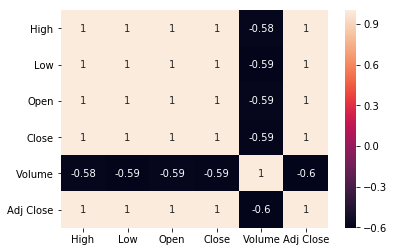

In [169]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True)

In [260]:
df_test = df[-250:] #500
print(df_test.shape)
df_test.head()

(250, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-15,97.709999,95.360001,96.199997,97.129997,79833900.0,91.037811
2016-01-19,98.650002,95.500000,98.410004,96.660004,53087700.0,90.597290
2016-01-20,98.190002,93.419998,95.099998,96.790001,72334400.0,90.719131
2016-01-21,97.879997,94.940002,97.059998,96.300003,52161500.0,90.259872
2016-01-22,101.459999,98.370003,98.629997,101.419998,65800500.0,95.058739


In [261]:
df_train = df[:-250] #500
print(df_train.shape)
df_test.head()

(1519, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-15,97.709999,95.360001,96.199997,97.129997,79833900.0,91.037811
2016-01-19,98.650002,95.500000,98.410004,96.660004,53087700.0,90.597290
2016-01-20,98.190002,93.419998,95.099998,96.790001,72334400.0,90.719131
2016-01-21,97.879997,94.940002,97.059998,96.300003,52161500.0,90.259872
2016-01-22,101.459999,98.370003,98.629997,101.419998,65800500.0,95.058739


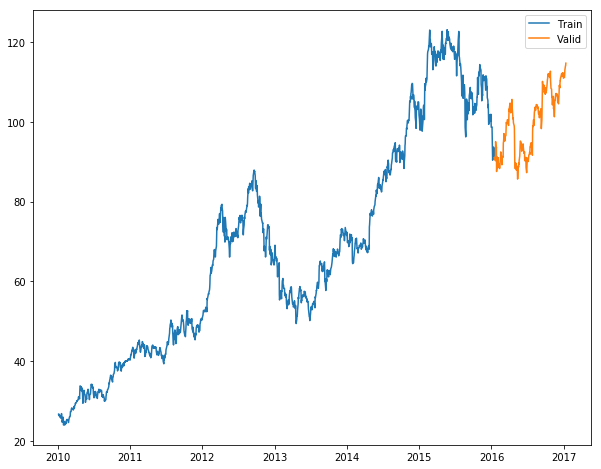

In [262]:
# Plotting Train and Test data
import matplotlib.pyplot as plt

def plot_train_val(train_data, val_data):
    fig = plt.figure(figsize=[10,8])
    ax = plt.subplot(111)
    ax.plot(train_data, label='Train')
    ax.plot(val_data, label='Valid')
    ax.legend()
    plt.show()
    
plot_train_val(df_train['Adj Close'], df_test['Adj Close'])

In [263]:
window = 7                       # We will use the last 6 day data to make prediction
train_data = df_train['Adj Close']
test_data = df_test['Adj Close']
index = len(train_data) - window
index

1512

In [264]:
import pandas as pd
import numpy as np

data = pd.DataFrame(np.zeros((index, window)))

for row in range(index):
  for col in range(window):
    data.iloc[row,col] = train_data[col+row]

data

,0,1,2,3,4,5,6
0,26.681330,26.727465,26.302330,26.253704,26.428249,26.195114,25.897146
1,26.727465,26.302330,26.253704,26.428249,26.195114,25.897146,26.262434
2,26.302330,26.253704,26.428249,26.195114,25.897146,26.262434,26.110340
3,26.253704,26.428249,26.195114,25.897146,26.262434,26.110340,25.673977
4,26.428249,26.195114,25.897146,26.262434,26.110340,25.673977,26.809748
5,26.195114,25.897146,26.262434,26.110340,25.673977,26.809748,26.397085
6,25.897146,26.262434,26.110340,25.673977,26.809748,26.397085,25.940775
7,26.262434,26.110340,25.673977,26.809748,26.397085,25.940775,24.654148
8,26.110340,25.673977,26.809748,26.397085,25.940775,24.654148,25.317411
9,25.673977,26.809748,26.397085,25.940775,24.654148,25.317411,25.675222


In [265]:
y_train = data.iloc[:,-1]
y_train.shape

(1512,)

In [266]:
X_train = data.iloc[:,:-1]
X_train.shape

(1512, 6)

In [0]:
index = len(test_data) - window

In [268]:
data = pd.DataFrame(np.zeros((index, window)))
for row in range(index):
  for col in range(window):
    data.iloc[row,col] = train_data[col+row]
data

,0,1,2,3,4,5,6
0,26.681330,26.727465,26.302330,26.253704,26.428249,26.195114,25.897146
1,26.727465,26.302330,26.253704,26.428249,26.195114,25.897146,26.262434
2,26.302330,26.253704,26.428249,26.195114,25.897146,26.262434,26.110340
3,26.253704,26.428249,26.195114,25.897146,26.262434,26.110340,25.673977
4,26.428249,26.195114,25.897146,26.262434,26.110340,25.673977,26.809748
5,26.195114,25.897146,26.262434,26.110340,25.673977,26.809748,26.397085
6,25.897146,26.262434,26.110340,25.673977,26.809748,26.397085,25.940775
7,26.262434,26.110340,25.673977,26.809748,26.397085,25.940775,24.654148
8,26.110340,25.673977,26.809748,26.397085,25.940775,24.654148,25.317411
9,25.673977,26.809748,26.397085,25.940775,24.654148,25.317411,25.675222


In [269]:
y_test = data.iloc[:,-1]
y_test.shape

(243,)

In [270]:
X_test = data.iloc[:,:-1]
X_test.shape

(243, 6)

## Linear Regression model

In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [272]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_lr)
print("Root Mean Squared Error: ", np.sqrt(mse))

Root Mean Squared Error:  0.5347394056075248


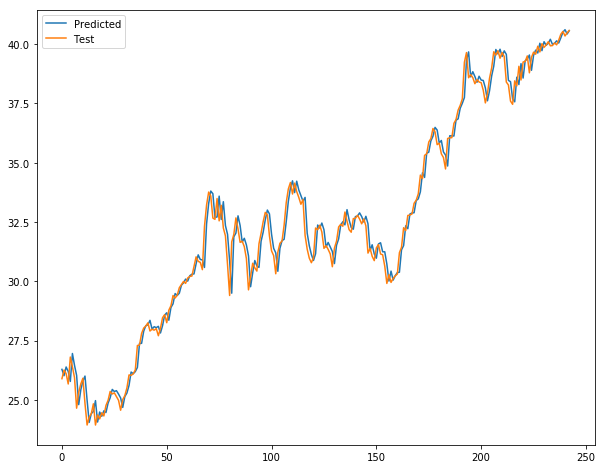

In [273]:
fig = plt.figure(figsize=[10,8])
ax = plt.subplot(111)
ax.plot(y_test.index, y_pred_lr, label='Predicted')
ax.plot(y_test, label='Test')
ax.legend()
plt.show()

## Laso Regression

In [0]:
from sklearn.linear_model import Lasso
lr = Lasso(alpha=0.2)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [275]:
mse = mean_squared_error(y_test, y_pred_lr)
print("Root Mean Squared Error: ", np.sqrt(mse))

Root Mean Squared Error:  0.5402485677454705


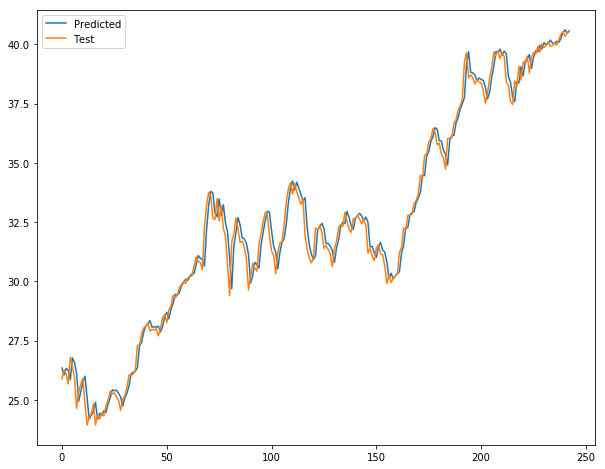

In [276]:
fig = plt.figure(figsize=[10,8])
ax = plt.subplot(111)
ax.plot(y_test.index, y_pred_lr, label='Predicted')
ax.plot(y_test, label='Test')
ax.legend()
plt.show()

## Ridge Regression

In [0]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [278]:
mse = mean_squared_error(y_test, y_pred_ridge)
print("Root Mean Squared Error: ", np.sqrt(mse))

Root Mean Squared Error:  0.5347411531707015


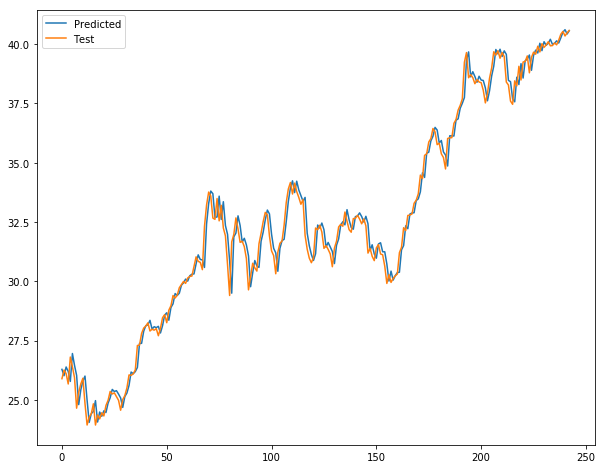

In [279]:
fig = plt.figure(figsize=[10,8])
ax = plt.subplot(111)
ax.plot(y_test.index, y_pred_ridge, label='Predicted')
ax.plot(y_test, label='Test')
ax.legend()
plt.show()